<a href="https://colab.research.google.com/github/sujaykhandekar/Deep-Learning-Projects/blob/master/google_image_collector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

urls=Array.from(document.querySelectorAll('.rg_i')).map(el=> el.hasAttribute('data-src')?el.getAttribute('data-src'):el.getAttribute('data-iurl'));
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));

In [1]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [2]:

!pip install "torch==1.4" "torchvision==0.5.0"

     |████████████████████████████████| 753.4MB 20kB/s 
     |████████████████████████████████| 4.0MB 32.2MB/s 
  Found existing installation: torch 1.5.1+cu101
    Uninstalling torch-1.5.1+cu101:
      Successfully uninstalled torch-1.5.1+cu101
  Found existing installation: torchvision 0.6.1+cu101
    Uninstalling torchvision-0.6.1+cu101:
      Successfully uninstalled torchvision-0.6.1+cu101


In [4]:
from fastai.vision import *

In [8]:
folder = 'baby'
file = 'baby.txt'

In [12]:
folder = 'adult'
file = 'adult.txt'


In [13]:

path = Path('data/age_detector')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [14]:
download_images(path/file, dest)

In [15]:
classes = ['baby','adult']

In [16]:

for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

baby


adult


In [17]:

np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [18]:
data.classes

['adult', 'baby']

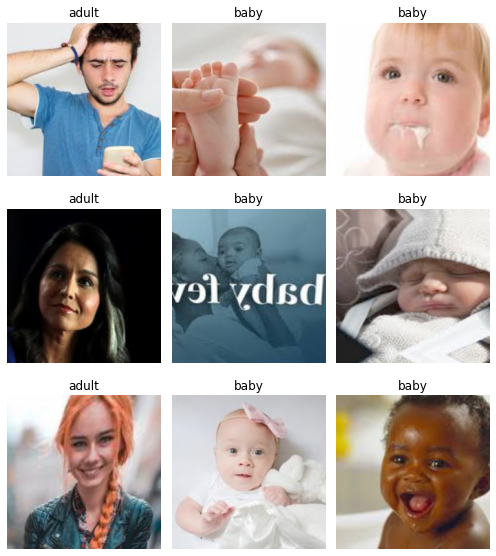

In [19]:
data.show_batch(rows=3, figsize=(7,8))

In [20]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['adult', 'baby'], 2, 451, 112)

In [34]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

In [35]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy,time
0,0.704383,0.270578,0.875000,00:06
1,0.483443,0.124871,0.973214,00:06
2,0.369531,0.178325,0.964286,00:06
3,0.285721,0.207260,0.955357,00:06
4,0.241217,0.196164,0.937500,00:06
5,0.204369,0.213112,0.928571,00:06
6,0.176628,0.231339,0.946429,00:05
7,0.157323,0.248954,0.946429,00:06
8,0.137029,0.258727,0.946429,00:06
9,0.120531,0.262425,0.946429,00:06


In [23]:
learn.save('stage-1')

In [36]:
learn.unfreeze()
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


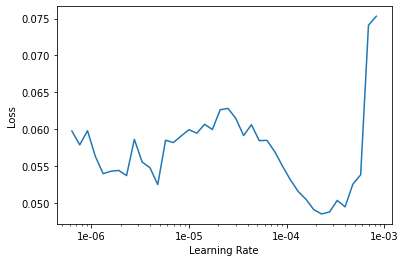

In [37]:
learn.recorder.plot()

In [38]:
learn.fit_one_cycle(5, max_lr=slice(1e-4,1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.078607,0.848616,0.848214,00:06
1,0.112244,0.726122,0.866071,00:06
2,0.140911,0.881960,0.875000,00:06
3,0.124943,0.694340,0.910714,00:06
4,0.108213,0.636308,0.901786,00:06


In [29]:
learn.save('stage2')

In [30]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (451 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
adult,adult,adult,adult,adult
Path: data/age_detector;

Valid: LabelList (112 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
baby,baby,baby,adult,baby
Path: data/age_detector;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, tr

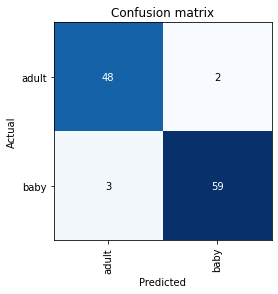

In [31]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()